A notebook created to play with the lorenz data 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch

from utils import get_data_from_h5, DATASET_MODES
sns.set(style='white', palette='colorblind', context='poster')
fpath = "data/lfads_lorenz.h5"

1248 50 29
312 50 29
show the data from the 5-th trial


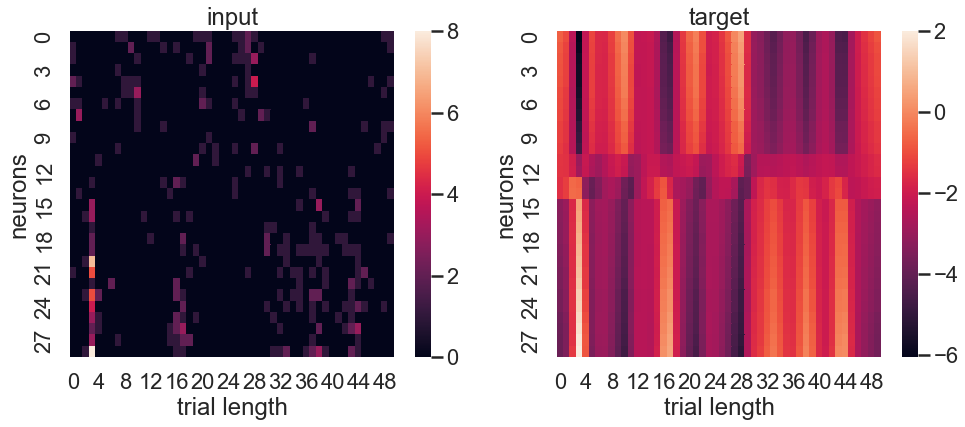

In [5]:
'''test '''
spikes_train, rates_train, _, _ = get_data_from_h5(
    DATASET_MODES.train, fpath)
spikes_val, rates_val, _, _ = get_data_from_h5(
    DATASET_MODES.val, fpath)

# spikes_train = torch.tensor(spikes_train).long()
# spikes_val = torch.tensor(spikes_val).long()

num_trials_train, trial_length, num_neurons = np.shape(spikes_train)
num_trials_val, trial_length, num_neurons = np.shape(spikes_val)

print(num_trials_train, trial_length, num_neurons)
print(num_trials_val, trial_length, num_neurons)

f,axes=plt.subplots(1,2, figsize=(16,6))
i = 5
sns.heatmap(spikes_val[i].T,ax=axes[0])
sns.heatmap(rates_val[i].T,ax=axes[1])


axes[0].set_title('input')
axes[0].set_xlabel('trial length')
axes[0].set_ylabel('neurons')
axes[1].set_title('target')
axes[1].set_xlabel('trial length')
axes[1].set_ylabel('neurons')

print(f'show the data from the {i}-th trial')

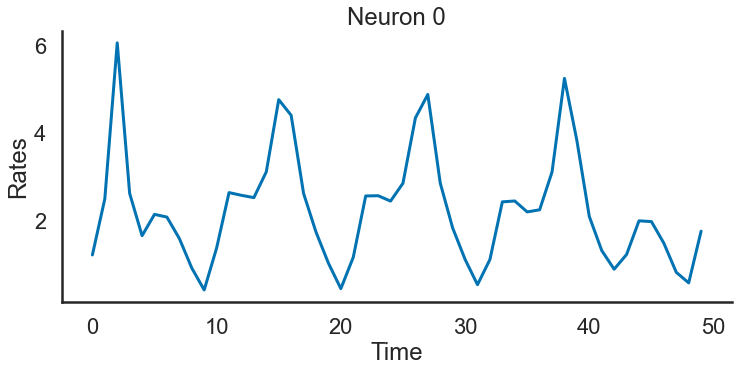

In [19]:
f, ax = plt.subplots(1,1, figsize=(12,5)) 
i = 0
j = 0
ax.plot(-rates_val[i][:,j])
ax.set_title(f'Neuron {j}')
ax.set_ylabel('Rates')
ax.set_xlabel('Time')
sns.despine()

In [15]:
all_spikes = np.concatenate([spikes_train, spikes_val], axis=0)

unique, counts = np.unique(all_spikes, return_counts=True)
print('Distribution of spikes')
dict(zip(unique, counts))

Distribution of spikes


{0.0: 1875993,
 1.0: 281981,
 2.0: 62317,
 3.0: 21210,
 4.0: 9442,
 5.0: 4780,
 6.0: 2455,
 7.0: 1409,
 8.0: 831,
 9.0: 517,
 10.0: 384,
 11.0: 249,
 12.0: 155,
 13.0: 108,
 14.0: 53,
 15.0: 49,
 16.0: 28,
 17.0: 23,
 18.0: 10,
 19.0: 5,
 20.0: 1}

Distribution of rates


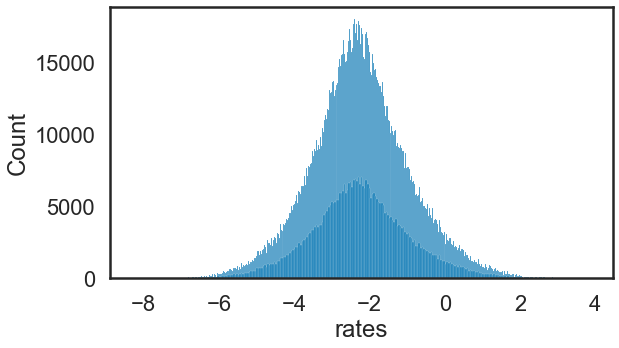

In [23]:
f, ax = plt.subplots(1,1, figsize = (9, 5))
ax.set_xlabel('rates')
sns.histplot(rates_train.flatten())
sns.histplot(rates_val.flatten())
print('Distribution of rates')
# dict(zip(unique, counts))

Distribution of rates, normalized


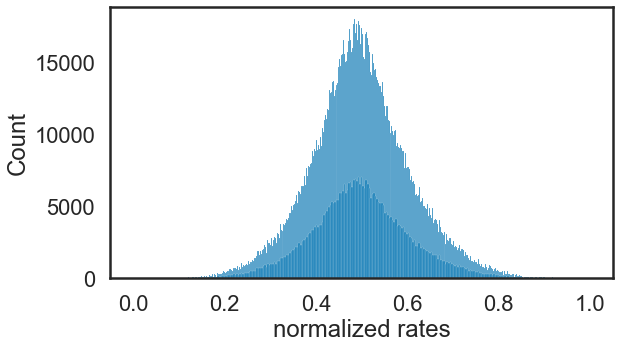

In [27]:
rates_train_n = (rates_train - rates_train.min()) / (rates_train.max() - rates_train.min())
rates_val_n = (rates_val - rates_val.min()) / (rates_val.max() - rates_val.min())

f, ax = plt.subplots(1,1, figsize = (9, 5))
ax.set_xlabel('normalized rates')
sns.histplot(rates_train_n.flatten())
sns.histplot(rates_val_n.flatten())
print('Distribution of rates, normalized')
# dict(zip(unique, counts))

In [28]:
print(rates_train_n.max())
print(rates_train_n.min())
print(rates_val_n.max())
print(rates_val_n.min())

1.0
0.0
1.0
0.0


In [12]:
# import h5py
# data_dict = {}
# with h5py.File(fpath, "r") as f:
#     for k in list(f.keys()):
#         data_dict[k] = list(f[k])

# for k,v in data_dict.items():
#     print(k)
#     print(np.shape(v))

# '''show the x vs y and train vs. test'''
# # f,axes=plt.subplots(2,2, figsize=(16,12))
# # sns.heatmap(data_dict['train_data'][0],ax=axes[0,0])
# # sns.heatmap(data_dict['train_truth'][0],ax=axes[0,1])
# # sns.heatmap(data_dict['valid_data'][0],ax=axes[1,0])
# # sns.heatmap(data_dict['valid_truth'][0],ax=axes[1,1])

# '''they sampled 1 valid trial for every 6 trials '''
# # plt.plot(data_dict['train_inds'])
# # plt.plot(data_dict['valid_inds'])


# # plt.plot(data_dict['train_truth'][0][:,0])
# # plt.plot(data_dict['train_truth'][0][:,-1])